In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Your work

In [4]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Who are the three ATP players with the most wins?

In [5]:
best_players = df_atp.Winner.value_counts()[:3].reset_index()
best_players.items

<bound method DataFrame.items of          index  Winner
0   Federer R.    1121
1     Nadal R.     891
2  Djokovic N.     802>

# How many sets did the player “Federer R.” win in total?

In [6]:
df_atp['Wsets'] = pd.to_numeric(df_atp['Wsets'], errors='coerce')
df_atp['Lsets'] = pd.to_numeric(df_atp['Lsets'], errors='coerce')
set_total = df_atp[(df_atp.Winner == 'Federer R.')].Wsets.sum() + df_atp[(df_atp.Loser == 'Federer R.')].Lsets.sum()
print(f'Federer R won {set_total} in total')

Federer R won 2695.0 in total


# How many sets did the player “Federer R.” win during the years 2016 and 2017?


In [7]:
a = df_atp[df_atp.Winner == 'Federer R.'].loc[(df_atp.Date.dt.year == 2016)].Wsets.sum() + df_atp[df_atp.Loser == 'Federer R.'].loc[(df_atp.Date.dt.year == 2016)].Lsets.sum()
b = df_atp[df_atp.Winner == 'Federer R.'].loc[(df_atp.Date.dt.year == 2017)].Wsets.sum() + df_atp[df_atp.Loser == 'Federer R.'].loc[(df_atp.Date.dt.year == 2017)].Lsets.sum()
c = a+b
w = [[a,b, c]]
Fed_Win_16_17 = pd.DataFrame(w, columns=['2016', '2017', 'total'], index= ['fed_wins'])
Fed_Win_16_17

,2016,2017,total
fed_wins,58.0,124.0,182.0


# For each match, what is the percentage of victories of the winner in the past?

In [8]:
def previous_w_percentage(player, date, df_atp):
    df_previous = df_atp[df_atp["Date"] < date]
    previous_wins = (df_previous["Winner"] == player).sum()
    previous_losses = (df_previous["Loser"] == player).sum()
    
    if previous_wins + previous_losses == 0:
        return 0
    
    return previous_wins / (previous_wins + previous_losses)


In [9]:
df_atp_sorted = df_atp.sort_values("Date") 
df_atp_sorted["winner_previous_win_percentage"] = 0.0  

for idx, row in df_atp_sorted.iterrows():
    player = row["Winner"]
    date = row["Date"]
    df_before_date = df_atp_sorted.loc[:idx]  
    win_percentage = previous_w_percentage(player, date, df_before_date)
    df_atp_sorted.at[idx, "winner_previous_win_percentage"] = win_percentage

df_atp = df_atp_sorted.sort_index()

In [10]:
df_atp[["Winner","winner_previous_win_percentage"]]

,Winner,winner_previous_win_percentage
0,Dosedel S.,0.000000
1,Enqvist T.,0.000000
2,Escude N.,0.000000
3,Federer R.,0.000000
4,Fromberg R.,0.000000
...,...,...
52293,Zverev A.,0.664032
52294,Djokovic N.,0.829876
52295,Zverev A.,0.665354
52296,Djokovic N.,0.830052


# I- Analyse exploratoire des donnees et comprehensions des variables

In [902]:
print(df_atp.shape)
print("\n")
print(df_atp.info())
print("\n")

print(df_atp.head())
print("\n")

print(df_atp.describe())


(52298, 54)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52283 non-null  object        
 12  LRank       52220 non-null  object        
 13  W1          52035 non-null  float64       
 14  L1          52037 non-null  float64       
 15  W2          51526 non-null  object        
 16  L2      

##

## 1- Performance des joeurs

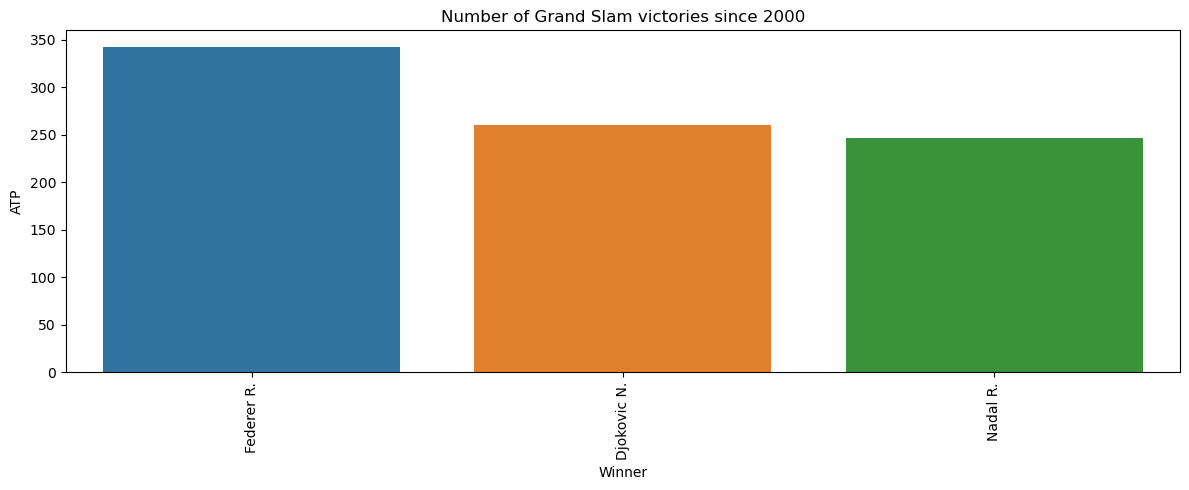

In [903]:
df_gs = df_atp[df_atp.Series == 'Grand Slam'].groupby(['Winner']).agg({
    'ATP':'count'}).sort_values(by='ATP', ascending=False).iloc[0:3]

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x=df_gs.index, y=df_gs.ATP)
ax.set_xticklabels(labels=df_gs.index, rotation=90)
ax.set(title='Number of Grand Slam victories since 2000')
ax.figure.tight_layout()
plt.show()

Federer R. est celui qui a le plus de victoire dand la competion Grand Slam ensuite vient Djokovic

## 2- Performance des joueurs sur les surfarce

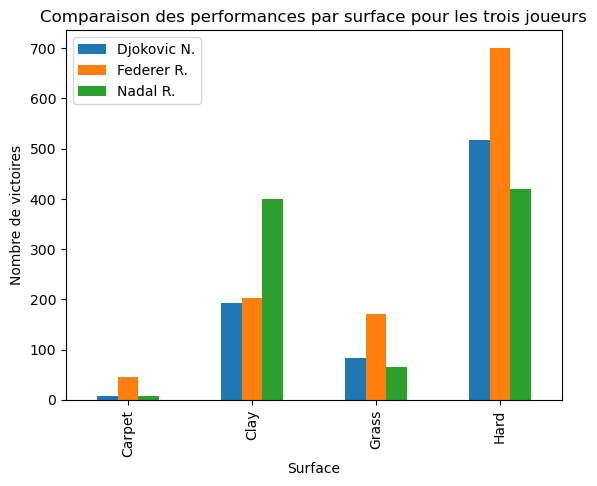

In [904]:
best_players_name = best_players['index'].tolist()

df_players = df_atp[df_atp['Winner'].isin(best_players_name)]
surface_wins = df_players.groupby(['Surface', 'Winner']).size().unstack()

surface_wins.plot(kind='bar')

plt.xlabel('Surface')
plt.ylabel('Nombre de victoires')
plt.title('Comparaison des performances par surface pour les trois joueurs')
plt.legend()
plt.show()

tous les joeurs on une perfomance elevé sur une surface Hard et tres basse sur une surface Carpet et moyenne sur les surface Clay et Grass, la surface a donc un impacte sur la perfomance des joeurs donc une  variable cruciale pour notre analyse future

## 3- Rang des joeur au fil des annees

C:\Users\serge\AppData\Local\Temp\ipykernel_14108\2601492659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_players['Average_Rank'] = (df_top_players['WRank'] + df_top_players['LRank']) / 2


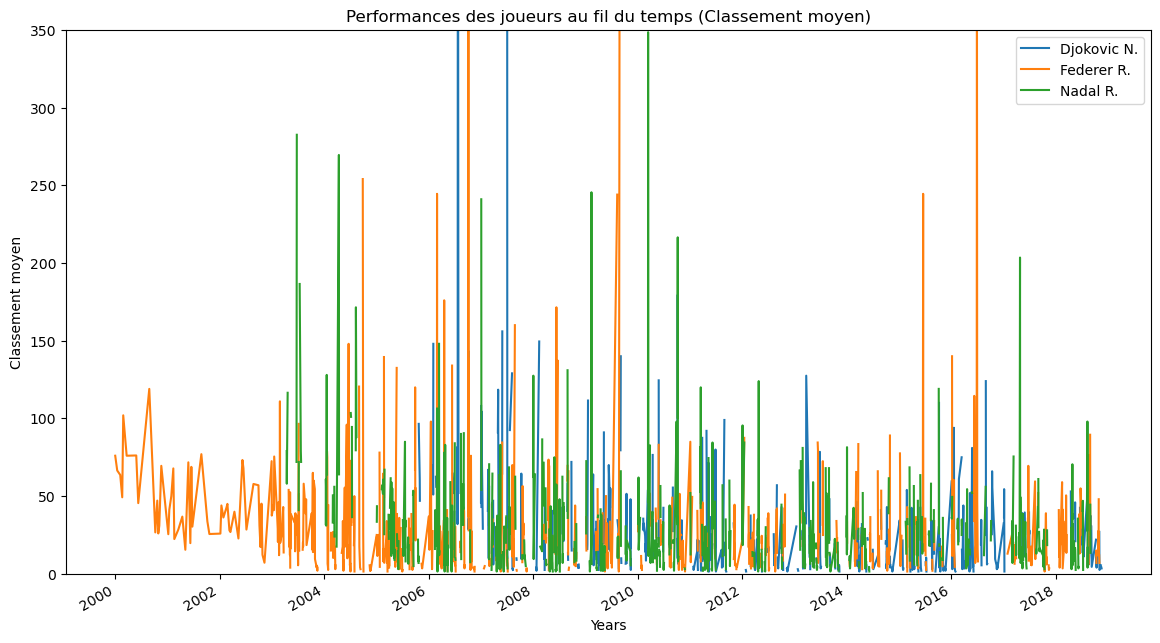

In [905]:
df = df_atp[(df_atp['WRank'] != 'NR') & (df_atp['LRank'] != 'NR')]
top_players = df['Winner'].value_counts().head(3) 
top_players_names = top_players.index.tolist()
df_top_players = df[df['Winner'].isin(top_players_names)]
df_top_players['Average_Rank'] = (df_top_players['WRank'] + df_top_players['LRank']) / 2
average_rank_over_time = df_top_players.groupby(['Date', 'Winner'])['Average_Rank'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 8)) 
average_rank_over_time.plot(ax=ax)
plt.xlabel('Years')
plt.ylabel('Classement moyen')
plt.title('Performances des joueurs au fil du temps (Classement moyen)')
plt.ylim(0, 350)
plt.legend()
plt.show()


Federer a commencé à jouer au tennis en 2000 avec une performance initiale d'environ 100. Au fil du temps, sa performance s'est généralement améliorée, bien qu'il ait connu quelques baisses.

Nadal a également commencé avec une performance relativement bonne, qui s'est également améliorée au fil du temps.

Djokovic a commencé un peu plus tard que les autres joueurs et a initialement affiché une performance très médiocre. Cependant, il a réussi à l'améliorer progressivement au fil du temps.

# II - Feature engineering

## A - Etude et selection des colones 


In [906]:
print(df_atp.columns)
print('\n')
print(len(df_atp.columns),'Colonnes')

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')


54 Colonnes


Nous avons 55 colones dans notre dataset, essayons de comprendre les variables et selectionner les plus importantes

### 1- Variable **comment** 

In [907]:
df_atp.Comment.value_counts()

Completed       50358
Retired          1680
Walkover          258
Disqualified        1
Sched               1
Name: Comment, dtype: int64

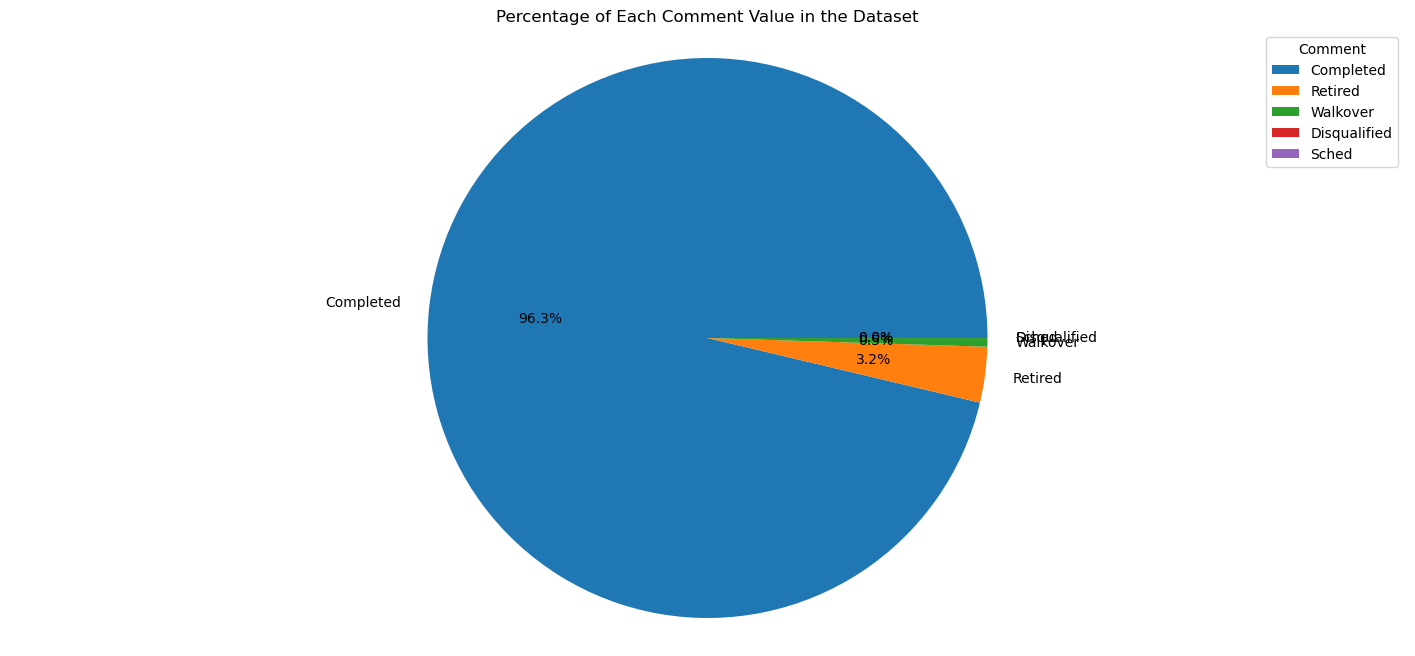

In [908]:
comment_counts = df_atp['Comment'].value_counts()
total_comments = len(df_atp)
percentages = (comment_counts / total_comments) * 100

plt.figure(figsize=(18,8))
plt.pie(percentages, labels=percentages.index,  autopct='%1.1f%%')

plt.title('Percentage of Each Comment Value in the Dataset')
plt.axis('equal') 
plt.legend(title='Comment', loc='best')

plt.show()


**96.3 pourcent** des matchs on été terminé, nous consiérons donc tous les matchs comme terminés et retirons la variable *comments* du dataset pour les annalyse futures.

### 2- Variable L1-W1

In [909]:

colonnes = ['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']
proportion_valeurs_manquantes = df_atp[colonnes].isnull().sum() / len(df_atp)
print(proportion_valeurs_manquantes)


W1    0.005029
L1    0.004991
W2    0.014762
L2    0.014742
W3    0.537860
L3    0.537879
W4    0.909538
L4    0.909538
W5    0.965754
L5    0.965754
dtype: float64


Nous n'avons pas toutes les information sur le nombre de set gagné du 1er jusqu'au 5e jeux, de ce faire, nous allons les retirer et ne pas basé nos analyse sur chaque set

### 3- Etude des variable base sur cote des joeurs

C:\Users\serge\AppData\Local\Temp\ipykernel_14108\760673351.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_atp[variables].corr()


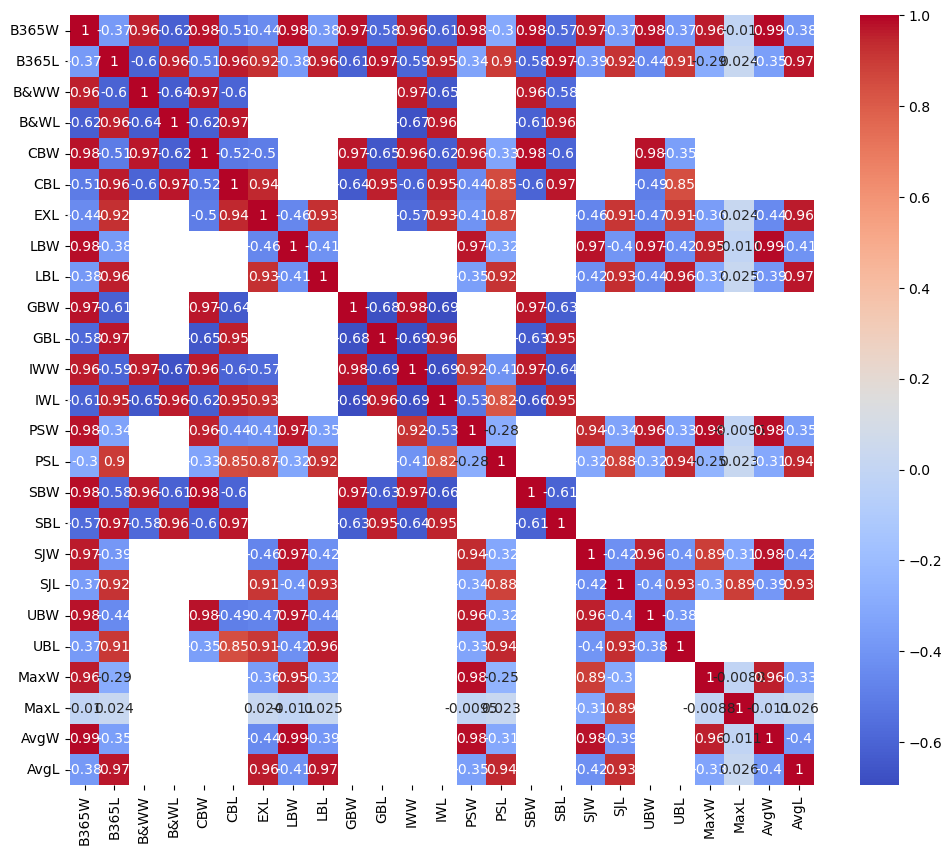

In [910]:
variables = ['B365W', 'B365L', 'B&WW', 'B&WL', 'CBW', 'CBL', 'EXW', 'EXL', 'LBW', 'LBL', 'GBW', 
             'GBL', 'IWW', 'IWL', 'PSW', 'PSL', 'SBW', 'SBL', 'SJW', 'SJL', 'UBW', 'UBL', 'MaxW', 'MaxL', 'AvgW', 'AvgL']

correlation_matrix = df_atp[variables].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


les cotes du Winner et Loser présentent une corrélation supérieure à 0,9 sur toutes les plateformes, cela suggère une forte corrélation entre ces variables. Dans ce cas, nous pouvons envisager de ne conserver qu'une seule variable représentant les cotes, plutôt que d'inclure les cotes de chaque plateforme et aussi conserver la variable des moyenne et celles du max. Pour ce faire nous conservons les variables (B365W,B365L, MaxW, MaxL, AvgW, AvgL )

### 4- Variables sur le ranking et sets


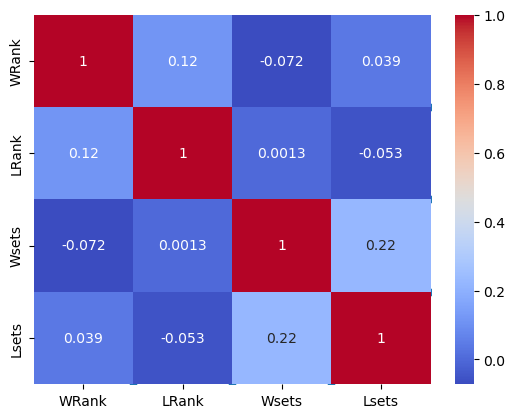

In [911]:
df = df_atp[(df_atp['WRank'] != 'NR') & (df_atp['LRank'] != 'NR')]
sns.scatterplot(x=df['WRank'], y=df['LRank'])
corr_matrix = df[['WRank', 'LRank', 'Wsets', 'Lsets']].astype(float).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

le rang des joeurs et le nombre de set par match ont eu corrélation très faible, ceci veut dire que le rang des joeur avant un match n'a pas d'influence sur le nombre de set accordé pendant un match 

### 5- Variable emplacement 

In [912]:
df_atp.Location.value_counts()

Paris         3306
London        2594
New York      2440
Melbourne     2413
Miami         1805
              ... 
Vienna          31
Orlando         31
San Marino      31
Pune            27
Lisbon          15
Name: Location, Length: 115, dtype: int64

In [913]:
df_atp.Tournament.value_counts()

US Open                     2413
Australian Open             2413
Wimbledon                   2413
French Open                 2413
Sony Ericsson Open          1140
                            ... 
LA Tennis Open                27
Dusseldorf Open               27
Royal Guard Open Chile        27
Power Horse Cup               27
Eastbourne International      27
Name: Tournament, Length: 214, dtype: int64

In [914]:
df_atp.Series.value_counts()

International         12204
ATP250                11424
Grand Slam             9652
Masters 1000           5662
Masters                5183
ATP500                 4133
International Gold     3755
Masters Cup             285
Name: Series, dtype: int64

Des variable Series et Tournament, nous allons conserver Series, elles donne pratiquement les meme information, on décide aussi, de supprimer la colone ATP qui est juste ne numero du tournois

  Nous allons ainsi conserver les variables suivantes pour l'instant: 
    **'Date', 'Series', 'Court', 'Surface', 
    'Round', 'Best of', 'Winner', 'Loser', 
    'WRank', 'LRank', 'Wsets', 'Lsets', 'B365W', 
    , 'MaxW', 'MaxL', 'AvgW', 'AvgL'**

In [915]:
columns_to_keep  = ['Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'LPts','WPts','Wsets', 'Lsets', 'B365W','MaxW', 'MaxL', 'AvgW', 'AvgL']
df_atp = df_atp[columns_to_keep]
df_atp.head()

,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,LPts,WPts,Wsets,Lsets,B365W,MaxW,MaxL,AvgW,AvgL
0,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN


## B - Etude et traitement des colonnes : valeur abéranets, valeurs manquantes et autres anomalies

## 1 - Valeurs  aberantes

In [916]:
df_atp.select_dtypes(include='number')

,Best of,LPts,WPts,Wsets,Lsets,B365W,MaxW,MaxL,AvgW,AvgL
0,3,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
4,3,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
52293,3,3155.0,5085.0,2.0,0.0,1.36,1.44,3.40,1.38,3.14
52294,3,4050.0,8045.0,2.0,0.0,1.20,1.22,6.03,1.17,5.14
52295,3,6020.0,5085.0,2.0,0.0,3.20,3.40,1.45,3.14,1.38
52296,3,4310.0,8045.0,2.0,0.0,1.11,1.15,7.72,1.12,6.52


Nous remarquons que les colones WRank et LRank qui sont des colonnes numerique ne sont pas afficher ici, il y a donc d'autre type de donnée

In [917]:
string_values_Wrank = df_atp['WRank'].loc[df_atp['WRank'].apply(lambda x: isinstance(x, str))]
string_values_Lrank = df_atp['LRank'].loc[df_atp['LRank'].apply(lambda x: isinstance(x, str))]
print(string_values_Wrank)
print(string_values_Lrank)

744    NR
Name: WRank, dtype: object
63      NR
377     NR
560     NR
611     NR
613     NR
618     NR
774     NR
1039    NR
1694    NR
1849    NR
3540    NR
3551    NR
4457    NR
5435    NR
5487    NR
5491    NR
5494    NR
5498    NR
5528    NR
5998    NR
6307    NR
6777    NR
7296    NR
7414    NR
7418    NR
8111    NR
9596    NR
Name: LRank, dtype: object


Il y a des valeur NR (no rank) dans colone WRank et LRank, pour l'instant on va les remplacer par nan (null)

In [918]:
df_atp['WRank'] = df_atp['WRank'].replace('NR', np.nan)
df_atp['LRank'] = df_atp['LRank'].replace('NR', np.nan)

C:\Users\serge\AppData\Local\Temp\ipykernel_14108\37968611.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = num_col_df.quantile(0.25)
C:\Users\serge\AppData\Local\Temp\ipykernel_14108\37968611.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = num_col_df.quantile(0.75)
C:\Users\serge\AppData\Local\Temp\ipykernel_14108\37968611.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  num_col_df = num_col_df[~((num_col_df < (Q1 - 1.5 * IQR)) | (num_col_df > (Q3 

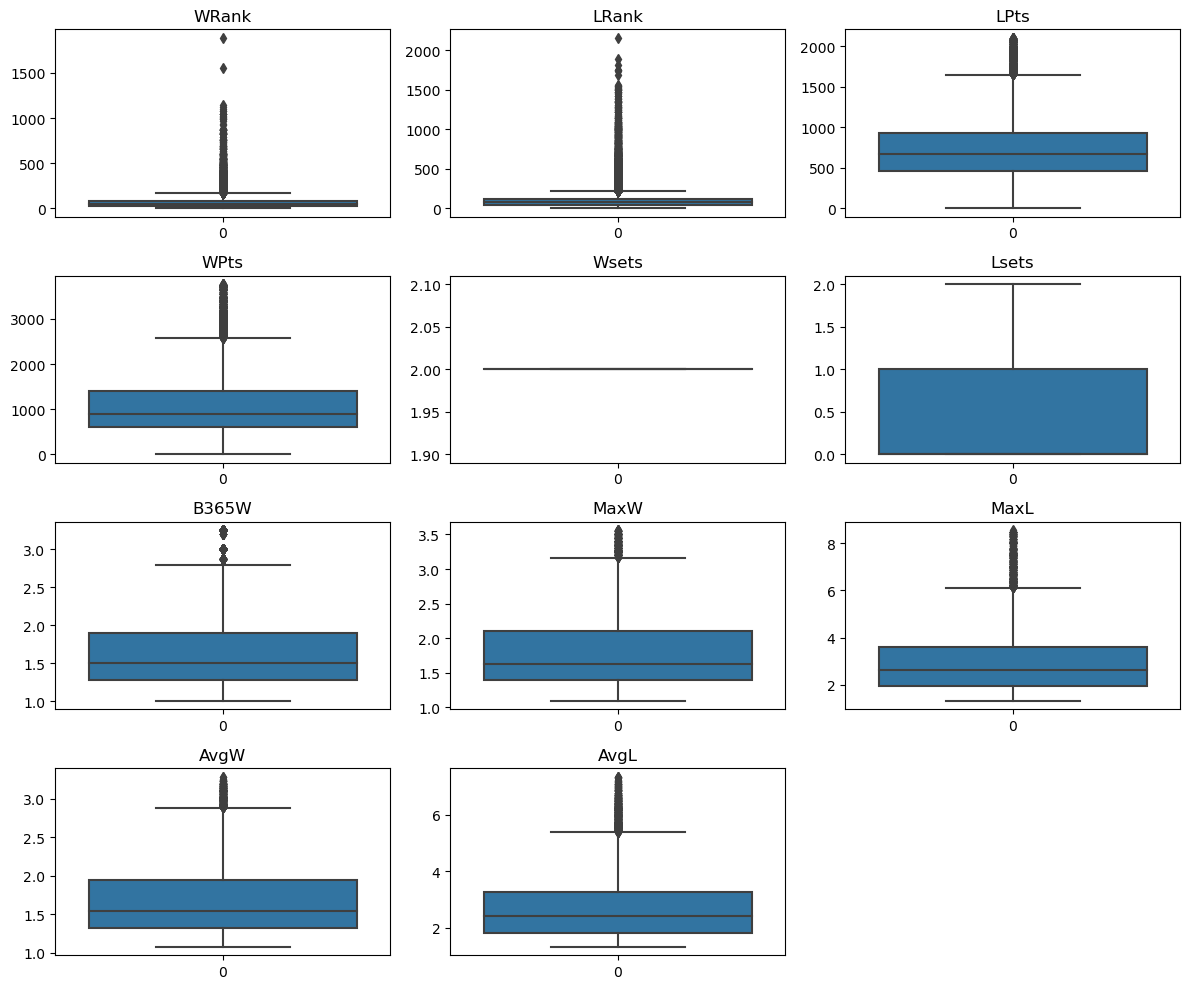

In [919]:

num_col_df = df[['WRank','LRank','LPts', 'WPts', 'Wsets', 'Lsets', 'B365W', 'MaxW', 'MaxL', 'AvgW', 'AvgL']]

Q1 = num_col_df.quantile(0.25)
Q3 = num_col_df.quantile(0.75)
IQR = Q3 - Q1
num_col_df = num_col_df[~((num_col_df < (Q1 - 1.5 * IQR)) | (num_col_df > (Q3 + 1.5 * IQR))).any(axis=1)]

num_rows = 4  
num_cols = 3  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(num_col_df.columns):
    sns.boxplot(data=num_col_df[col], ax=axes[i])  
    axes[i].set_title(col) 
     
if len(num_col_df.columns) < len(axes):
    for j in range(len(num_col_df.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


In [920]:
print(df_atp.Lsets.value_counts())
print(df_atp.Wsets.value_counts())

0.0    32647
1.0    17615
2.0     1810
Name: Lsets, dtype: int64
2.0    41248
3.0     9313
1.0     1095
0.0      418
Name: Wsets, dtype: int64


Sauf pour les colonnes `Wsets` et `Lsets`, nous allons remplacer les valeurs aberrantes des autres colonnes par des valeurs nulles (NaN) et les imputer ultérieurement en fonction de leur distribution. Cependant, pour les colonnes `WRank` et `LRank`, aucune modification ne sera effectuée car elles reflètent la performance des joueurs, ce qui a un impact significatif sur l'issue des matchs. Ainsi, les valeurs aberrantes seront gérées de manière appropriée tout en préservant l'importance des variables `WRank` et `LRank` dans l'analyse des données.

## 2- Traitement des valeurs abérentes

In [921]:
columns_to_impute = ['LPts', 'WPts', 'B365W', 'MaxW', 'MaxL', 'AvgW', 'AvgL']
df_atp[columns_to_impute] = df_atp[columns_to_impute].where(~((df_atp[columns_to_impute] < (Q1 - 1.5 * IQR)) | (df_atp[columns_to_impute] > (Q3 + 1.5 * IQR))), np.nan)

C:\Users\serge\AppData\Local\Temp\ipykernel_14108\772563332.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_atp[columns_to_impute] = df_atp[columns_to_impute].where(~((df_atp[columns_to_impute] < (Q1 - 1.5 * IQR)) | (df_atp[columns_to_impute] > (Q3 + 1.5 * IQR))), np.nan)
C:\Users\serge\AppData\Local\Temp\ipykernel_14108\772563332.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_atp[columns_to_impute] = df_atp[columns_to_impute].where(~((df_atp[columns_to_impute] < (Q1 - 1.5 * IQR)) | (df_atp[columns_to_impute] > (Q3 + 1.5 * IQR))), np.nan)


### 3-  Valeurs manquantes

Date           0
Series         0
Court          0
Surface        0
Round          0
Best of        0
Winner         0
Loser          0
WRank         16
LRank        105
LPts       19352
WPts       20442
Wsets        224
Lsets        226
B365W      11527
MaxW       31176
MaxL       31781
AvgW       31062
AvgL       31510
dtype: int64


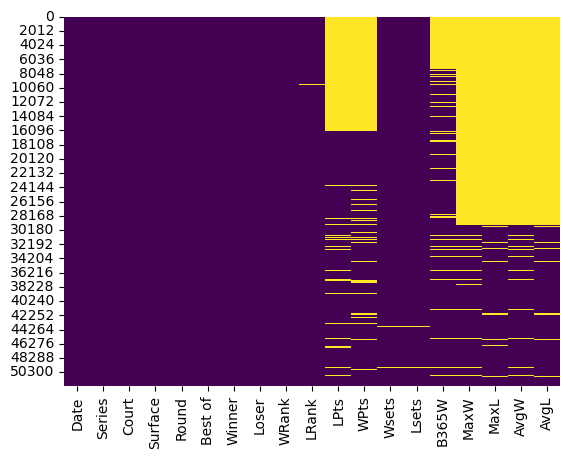

In [922]:
print(df_atp.isnull().sum())
sns.heatmap(df_atp.isnull(), cbar=False, cmap='viridis')
plt.show()

les valeurs manquantes sont en jaune. Faisons une étude en détaille de ces valeurs

C:\Users\serge\AppData\Local\Temp\ipykernel_14108\511758256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_col_df['Date'] = df_atp['Date']
C:\Users\serge\AppData\Local\Temp\ipykernel_14108\511758256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_col_df['Year'] = pd.to_datetime(df_atp['Date']).dt.year


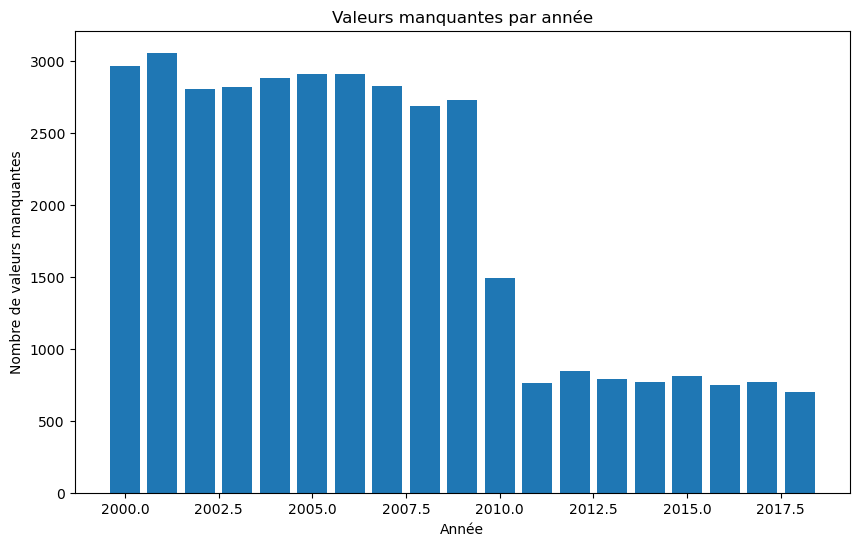

In [923]:
miss_col = ['LRank','WRank','WPts','LPts','Wsets', 'Lsets', 'B365W','MaxW', 'MaxL', 'AvgW', 'AvgL']
miss_col_df = df_atp[miss_col]
miss_col_df['Date'] = df_atp['Date']
miss_col_df['Year'] = pd.to_datetime(df_atp['Date']).dt.year

missing_counts = miss_col_df[miss_col_df.isnull().any(axis=1)].groupby('Year').size()

# Création du graphe en barres
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel('Année')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par année')
plt.show()


Il semble que les valeurs manquantes dans les données ont cessé d'être enregistrées après 2010, probablement parce qu'elles n'étaient plus considérées comme pertinentes ou nécessaires. Cela peut être dû à des changements dans la collecte de données ou dans les critères d'enregistrement.

### 4 -  distribution des valeur manquantes

In [924]:
miss_col_df[['LRank','WRank','WPts','LPts','Wsets', 'Lsets', 'B365W','MaxW', 'MaxL', 'AvgW', 'AvgL']].describe()

,LRank,WRank,WPts,LPts,Wsets,Lsets,B365W,MaxW,MaxL,AvgW,AvgL
count,52193.000000,52282.000000,31856.000000,32946.000000,52074.000000,52072.000000,40771.000000,21122.000000,20517.000000,21236.000000,20788.000000
mean,92.227042,59.172564,1128.738605,768.838675,2.141760,0.407801,1.609824,1.708451,3.046891,1.618946,2.779547
std,116.947845,73.614866,745.750978,432.113529,0.460311,0.557696,0.524617,0.586199,1.630452,0.523922,1.394103
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.010000,1.010000,1.010000,1.010000
25%,35.000000,17.000000,604.000000,474.000000,2.000000,0.000000,1.220000,1.270000,1.780000,1.220000,1.690000
50%,65.000000,41.000000,905.000000,692.000000,2.000000,0.000000,1.440000,1.530000,2.580000,1.450000,2.390000
75%,105.000000,77.000000,1460.000000,991.000000,2.000000,1.000000,1.830000,2.000000,3.780000,1.870000,3.450000
max,2159.000000,1890.000000,3775.000000,2106.000000,3.000000,2.000000,3.250000,3.560000,8.570000,3.290000,7.360000


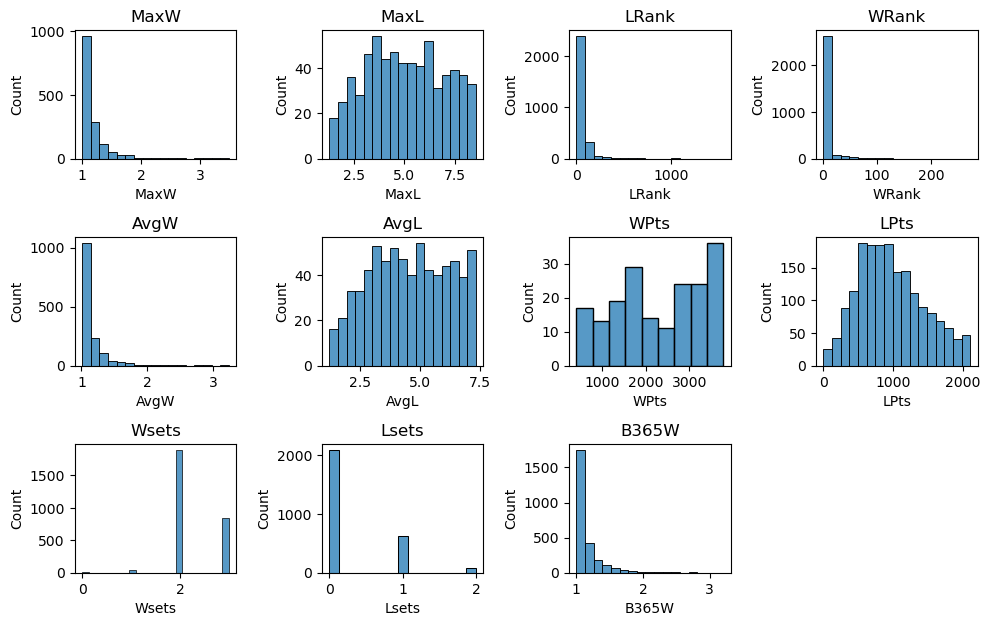

,LRank,WRank,WPts,LPts,Wsets,Lsets,B365W,MaxW,MaxL,AvgW,AvgL
count,52193.000000,52282.000000,31856.000000,32946.000000,52074.000000,52072.000000,40771.000000,21122.000000,20517.000000,21236.000000,20788.000000
mean,92.227042,59.172564,1128.738605,768.838675,2.141760,0.407801,1.609824,1.708451,3.046891,1.618946,2.779547
std,116.947845,73.614866,745.750978,432.113529,0.460311,0.557696,0.524617,0.586199,1.630452,0.523922,1.394103
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.010000,1.010000,1.010000,1.010000
25%,35.000000,17.000000,604.000000,474.000000,2.000000,0.000000,1.220000,1.270000,1.780000,1.220000,1.690000
50%,65.000000,41.000000,905.000000,692.000000,2.000000,0.000000,1.440000,1.530000,2.580000,1.450000,2.390000
75%,105.000000,77.000000,1460.000000,991.000000,2.000000,1.000000,1.830000,2.000000,3.780000,1.870000,3.450000
max,2159.000000,1890.000000,3775.000000,2106.000000,3.000000,2.000000,3.250000,3.560000,8.570000,3.290000,7.360000


In [925]:
fig, axs = plt.subplots(4, 4, figsize=(10, 8))

sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='MaxW',bins=17, ax=axs[0, 0])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='MaxL', bins=17, ax=axs[0, 1])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='AvgW',bins=17, ax=axs[1, 0])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='AvgL',bins=17, ax=axs[1, 1])

sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='LRank',bins=17, ax=axs[0, 2])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='WRank',bins=17, ax=axs[0, 3])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='WPts', ax=axs[1, 2])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='LPts',bins=17, ax=axs[1, 3])

sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='Wsets', ax=axs[2, 0])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='Lsets', ax=axs[2, 1])
sns.histplot(data=df_atp[df_atp.Winner.isin(top_players_names)], x='B365W',bins=17, ax=axs[2, 2])

axs[2, 3].remove()
axs[3, 0].remove()
axs[3, 1].remove()
axs[3, 2].remove()
axs[3, 3].remove()

axs[0, 0].set_title('MaxW')
axs[0, 1].set_title('MaxL')
axs[1, 0].set_title('AvgW')
axs[1, 1].set_title('AvgL')

axs[0, 2].set_title('LRank')
axs[0, 3].set_title('WRank')
axs[1, 2].set_title('WPts')
axs[1, 3].set_title('LPts')

axs[2, 0].set_title('Wsets')
axs[2, 1].set_title('Lsets')
axs[2, 2].set_title('B365W')

plt.tight_layout()

plt.show()

miss_col_df[['LRank', 'WRank', 'WPts', 'LPts', 'Wsets', 'Lsets', 'B365W', 'MaxW', 'MaxL', 'AvgW', 'AvgL']].describe()


Pour les variables `MaxW`, `MaxL`, `AvgW`, `AvgL`, `WPts`, `LPts` et `B365W`, qui présentent une distribution asymétrique droite, nous allons utiliser la médiane pour l'imputation des valeurs manquantes. En utilisant la médiane, nous évitons d'introduire des valeurs extrêmes potentielles qui pourraient fausser les résultats.

En ce qui concerne les variables `LRank` et `WRank`, nous observons une amélioration des performances des joueurs au fil du temps. Utiliser le minimum des valeurs pour l'imputation pourrait donner des valeurs trop basses à des joueurs qui n'avaient pas de bonnes performances. Par conséquent, pour éviter cela, nous utiliserons la moyenne des rankings pour l'imputation. Cela nous permettra de prendre en compte la tendance générale d'amélioration des performances des joueurs au fil du temps.

Pour les variables `Wsets` et `Lsets`, nous allons utiliser la valeur la plus fréquente (le mode) pour effectuer l'imputation. En choisissant la valeur la plus fréquente, nous tenons compte de la tendance dominante dans les données et évitons d'introduire des valeurs atypiques potentielles.

### 5 - Traitement des valeurs manquantes

In [926]:
# Variables with right-skewed distribution
asymmetric_columns = ['MaxW', 'MaxL', 'AvgW', 'AvgL', 'WPts', 'LPts', 'B365W']
for column in asymmetric_columns:
    df_atp[column] = df_atp[column].fillna(df_atp[column].median())

# Variables 'LRank' and 'WRank'
df_atp['LRank'] = df_atp['LRank'].fillna(df_atp['LRank'].mean())
df_atp['WRank'] = df_atp['WRank'].fillna(df_atp['WRank'].mean())

# Variables 'Wsets' and 'Lsets'
df_atp['Wsets'] = df_atp['Wsets'].fillna(df_atp['Wsets'].mode().iloc[0])
df_atp['Lsets'] = df_atp['Lsets'].fillna(df_atp['Lsets'].mode().iloc[0])


Date       0
Series     0
Court      0
Surface    0
Round      0
Best of    0
Winner     0
Loser      0
WRank      0
LRank      0
LPts       0
WPts       0
Wsets      0
Lsets      0
B365W      0
MaxW       0
MaxL       0
AvgW       0
AvgL       0
dtype: int64


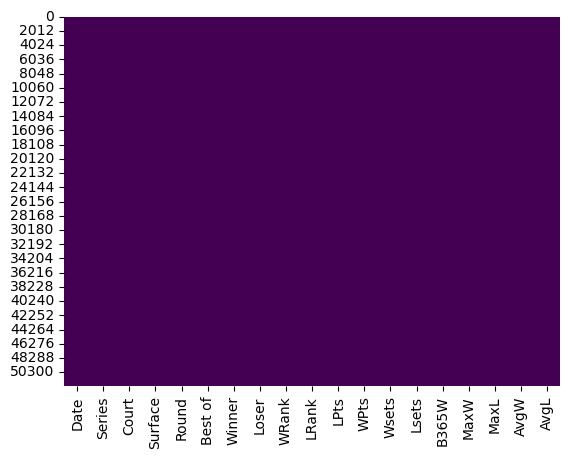

In [927]:
print(df_atp.isnull().sum())
sns.heatmap(df_atp.isnull(), cbar=False, cmap='viridis')
plt.show()

Nous n'avons plus de valeurs manquantes dans notre dataset

## C - Ajout de nouvelles variables

### 1- Ajout de la Target variable

J'ai rencontré des difficultés pour créer une target variable basée sur une probabilité de victoire du PlayerA. Par conséquent, j'ai opté pour une variable binaire à la place.
`Variable binaire`

Nous attribuons des  valeurs aléatoires aux "playerA" et "playerB" sur la base des colonnes "winner" et "loser", puis déterminons la variable target **outcome** . La colonne **outcome** sera égale à 1 si le "winner" est le "playerA" et a un rang inférieur ("WRank" < "LRank"), et à 0 dans le cas contraire.

In [928]:
import random

df_atp['playerA'] = df_atp.apply(lambda row: random.choice([row['Winner'], row['Loser']]), axis=1)
df_atp['playerB'] = df_atp.apply(lambda row: row['Winner'] if row['playerA'] == row['Loser'] else row['Loser'], axis=1)
df_atp['Outcome'] = df_atp.apply(lambda row: 1 if (row['Winner'] == row['playerA'] and row['WRank'] < row['LRank']) else 0, axis=1)

In [929]:
# # Assign an initial value of 0 to the 'Outcome' column
# df_atp['Outcome'] = 0

# def update_outcome(row):
#     loser_rank = row['LRank']
#     winner_rank = row['WRank']

#     # Handling 'NR' (No Rank) values by assigning a small default rank value- for loser and large for winner
#     if loser_rank == 'NR':
#         loser_rank = 0
#     if winner_rank == 'NR':
#         winner_rank = 1000

#     if int(loser_rank) < int(winner_rank):
#         return 0
#     else:
#         return 1

# df_atp['Outcome'] = df_atp.apply(update_outcome, axis=1)

# outcome_df = df_atp[['Winner', 'Loser', 'Outcome']]
# print(outcome_df.sample(15))


#### 2-1  Repartition des victoires et echecs dans la variable target 

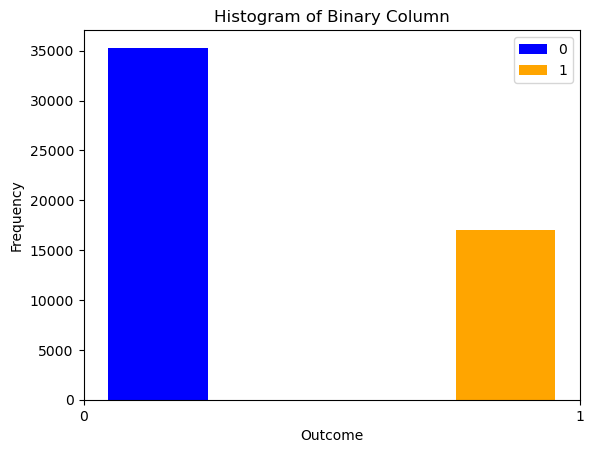

In [930]:

binary_column = df_atp['Outcome']

binary_0 = binary_column[binary_column == 0]
binary_1 = binary_column[binary_column == 1]

color_0 = 'blue'
color_1 = 'orange'

plt.hist([binary_0, binary_1], bins=2, color=[color_0, color_1], label=['0', '1'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column')
plt.legend()
plt.xticks([0, 1])
plt.show()


In [931]:
total_occurrences = df_atp['Outcome'].count()

# proportions actuelles de 0 et de 1 pour le player A
proportion_0 = df_atp['Outcome'].value_counts()[0] / total_occurrences
proportion_1 = df_atp['Outcome'].value_counts()[1] / total_occurrences
print("defaite ",proportion_0)
print("victoire ",proportion_1)

defaite  0.6748632834907645
victoire  0.32513671650923553


Le nombre d'échecs du joueur A est deux fois plus élevé que le nombre de victoires. Nous allons ajuster les valeurs en conservant les lignes où le joueur A a remporté la partie (valeur 1) et en injectant aléatoirement des valeurs 1 là où il n'a pas gagné (valeur 0), afin d'obtenir un pourcentage de victoires et de défaites relativement proportionnel.

In [932]:
# rows where PlayerA lost
Outcome_o = df_atp[df_atp['Outcome'] == 0]

num_rows_to_adjust = Outcome_o.shape[0] - int(0.7 * Outcome_o.shape[0])  
rows_to_adjust = Outcome_o.sample(n=num_rows_to_adjust, replace=True, random_state=42).index
df_atp.loc[rows_to_adjust, 'Outcome'] = 1

#### 2-2 - Ajustement des valeurs de **Outcome**

In [933]:
total_occurrences = df_atp['Outcome'].count()

proportion_0 = df_atp['Outcome'].value_counts()[0] / total_occurrences
proportion_1 = df_atp['Outcome'].value_counts()[1] / total_occurrences
print("defaite ",proportion_0)
print("victoire ",proportion_1)

defaite  0.49957933381773684
victoire  0.5004206661822632


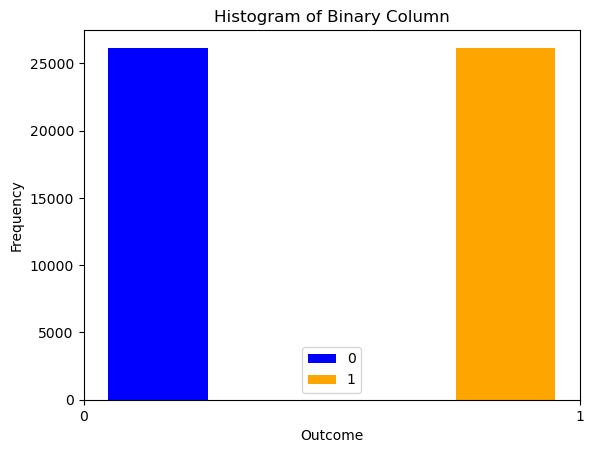

In [934]:
binary_column = df_atp['Outcome']

binary_0 = binary_column[binary_column == 0]
binary_1 = binary_column[binary_column == 1]

color_0 = 'blue'
color_1 = 'orange'

plt.hist([binary_0, binary_1], bins=2, color=[color_0, color_1], label=['0', '1'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column')
plt.legend()
plt.xticks([0, 1])
plt.show()


### 2 -  Variable base sur la Date

In [935]:
df_atp["Year"] = df_atp["Date"].dt.year.tolist()
df_atp["Month"] = df_atp["Date"].dt.month
df_atp["Day"] = df_atp["Date"].dt.day
df_atp["Weekday"] = df_atp["Date"].dt.weekday

### 3 - Ajout de **diff_rank** et **diff_pts**

In [937]:
df_atp['diff_rank'] = abs(df_atp['WRank'] - df_atp['LRank'])
df_atp['diff_pts'] = abs(df_atp['WPts'] - df_atp['LPts'])
df_atp[['diff_rank', 'diff_pts']]

,diff_rank,diff_pts
0,14.0,213.0
1,51.0,213.0
2,615.0,213.0
3,22.0,213.0
4,117.0,213.0
...,...,...
52293,5.0,213.0
52294,6.0,213.0
52295,2.0,213.0
52296,5.0,213.0


## D Transformation des variable

### 1- Transoformation des variables categorielle et binaire

#### Categorical to numeric variable

In [938]:
cour_binary = {'Outdoor': 0, 'Indoor': 1}
df_atp['Court'] = df_atp['Court'].map(cour_binary)

In [939]:
categorical_columns = df_atp.select_dtypes(include=["object"]).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Series', 'Surface', 'Round', 'Winner', 'Loser', 'playerA', 'playerB'], dtype='object')


In [940]:
df_atp.drop(columns=['Winner', 'Loser', 'Date', 'LRank', 'WRank', 'playerA', 'playerB'], axis=1, inplace=True)

Nous avons abandonné les variables `Winner", "Loser", "PlayerA" et "PlayerB` car elles représentent simplement les noms des joueurs, et nos prédictions ne sont pas basées sur les noms des joueurs. Les variables `LRank" et "WRank` ont été utilisées pour définir la variable cible. Afin d'éviter que le modèle ne se base uniquement sur les règles que nous avons définies, il est préférable de les supprimer.

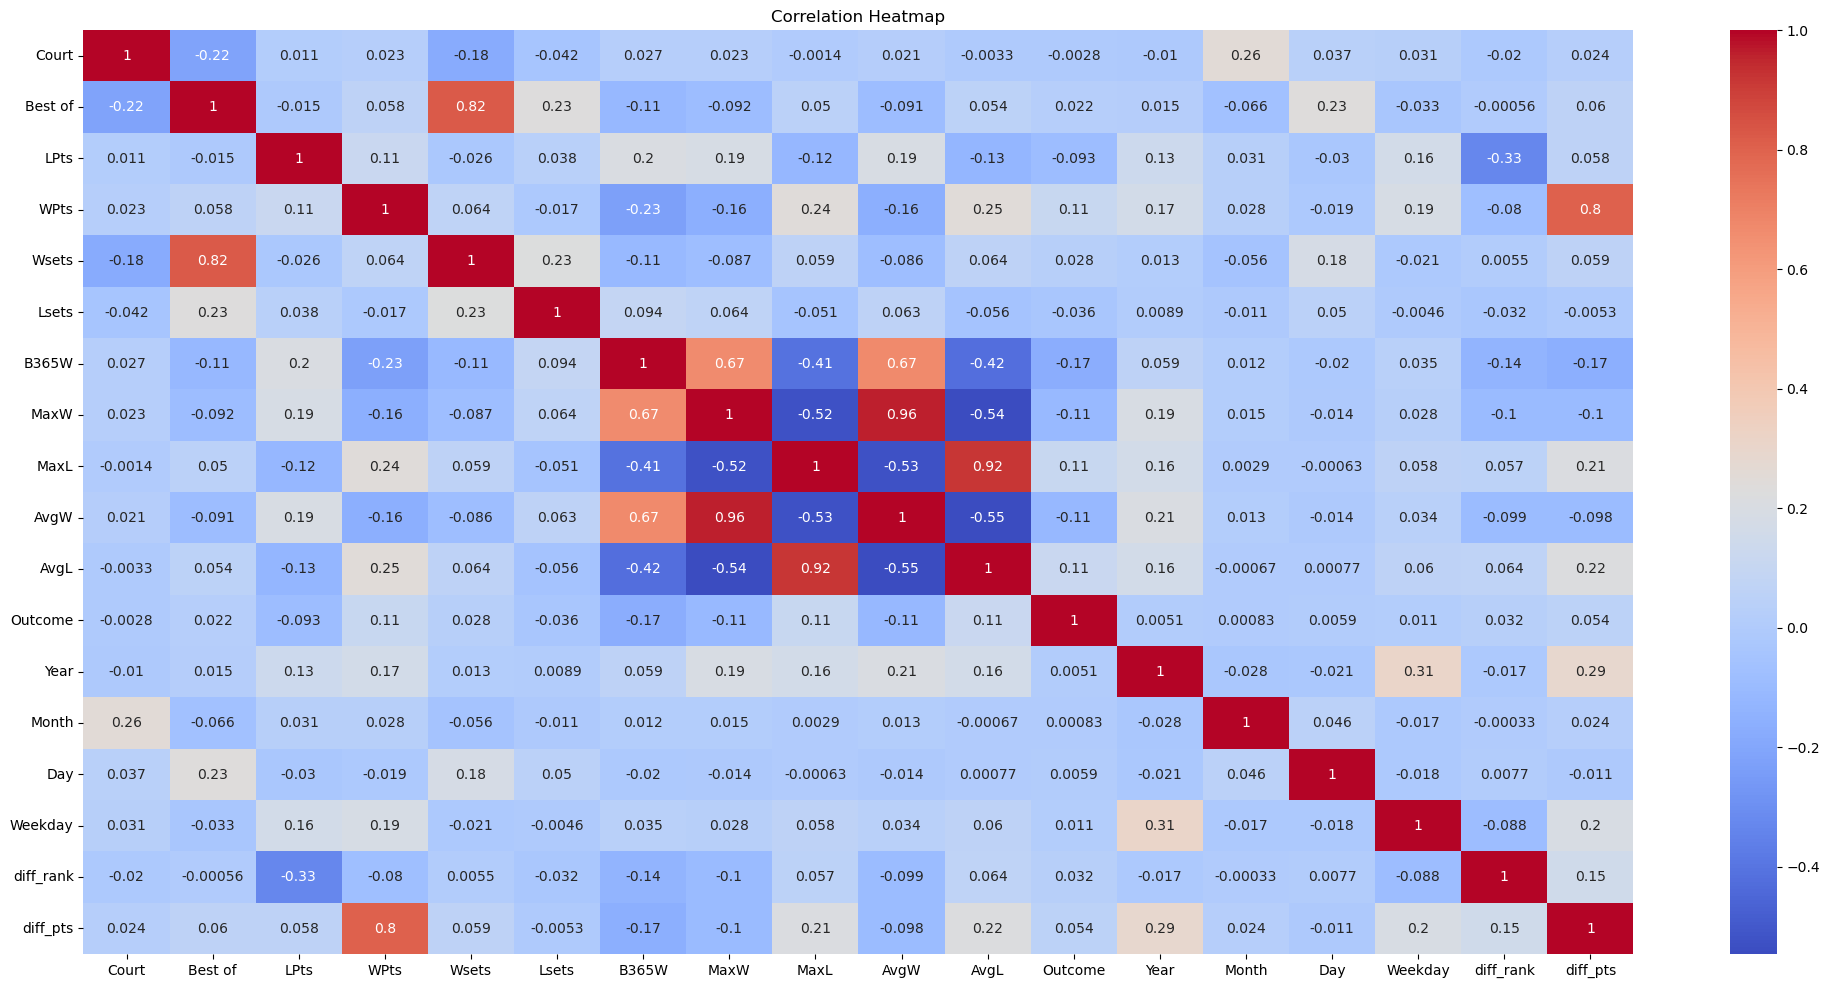

In [941]:
numeric_features = df_atp.select_dtypes(include='number')
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Nous avons identifié plusieurs variables présentant des corrélations élevées : `"Wsets" et "Best of"`, `"Wpts" et "diff_pts",  "AVGW" et "MaxW"` ansi que `"AvgW" et "B365W"`. Nous allons donc supprimer une variable de chaque paire.

In [942]:
df_atp.drop(columns= ['Best of', 'AvgW', 'B365W', "WPts"], inplace=True)

# **MACHINE LEARNING**

## A Data spliting

In [943]:
train_df_atp = df_atp[df_atp['Year'] < 2017]
test_df_atp = df_atp[df_atp['Year'] >= 2017]

train_features = train_df_atp.drop('Outcome', axis=1)
train_target = train_df_atp['Outcome']

test_features = test_df_atp.drop('Outcome', axis=1)
test_target = test_df_atp['Outcome']

print("Training set shape:", train_features.shape, train_target.shape)
print("Testing set shape:", test_features.shape, test_target.shape)

Training set shape: (47028, 16) (47028,)
Testing set shape: (5270, 16) (5270,)


##  1- columns transform and scaling

In [944]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, train_features.select_dtypes(include='number').columns),
        ('cat', categorical_transformer, train_features.select_dtypes(include='object').columns)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

train_features_preprocessed = pipeline.fit_transform(train_features)

test_features_preprocessed = pipeline.transform(test_features)

print(train_features_preprocessed)
print(test_features_preprocessed)

[[-0.46993678 -0.12579895 -0.30362105 ...  0.          0.
   0.        ]
 [-0.46993678 -0.12579895 -0.30362105 ...  0.          0.
   0.        ]
 [-0.46993678 -0.12579895 -0.30362105 ...  0.          0.
   0.        ]
 ...
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          1.
   0.        ]
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          1.
   0.        ]
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          0.
   1.        ]]
[[-0.46993678 -1.07640214 -0.30362105 ...  0.          0.
   0.        ]
 [-0.46993678  0.35544392 -0.30362105 ...  0.          0.
   0.        ]
 [-0.46993678  2.17050188 -0.30362105 ...  0.          0.
   0.        ]
 ...
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          1.
   0.        ]
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          1.
   0.        ]
 [ 2.12794579 -0.12579895 -0.30362105 ...  0.          0.
   1.        ]]


## B - Recherche de parametre optimaux pour les model : Grid Search

In [945]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### 1- Grid Regression logistique

In [946]:
# logistic_params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1, 10],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [100, 200, 500]
# }

# logreg_model_grid = LogisticRegression()
# logistic_grid = GridSearchCV(logreg_model_grid, logistic_params)
# logistic_grid.fit(train_features_preprocessed, train_target)

# print("Logistic Regression:")
# print("Best Parameters:", logistic_grid.best_params_)
# print("Best Accuracy:", logistic_grid.best_score_)

# Logistic Regression:
# Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
# Best Accuracy: 0.6724715580212071

### 2- Grid Decision Tree

In [947]:

# tree_params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# tree_model = DecisionTreeClassifier()

# tree_grid = GridSearchCV(tree_model, tree_params)
# tree_grid.fit(train_features_preprocessed, train_target)

# print("Decision Tree:")
# print("Best Parameters:", tree_grid.best_params_)
# print("Best Accuracy:", tree_grid.best_score_)

# Decision Tree:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
# Best Accuracy: 0.6693242914049342

### 3- Grid Random forest

In [948]:
# forest_params = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_model_grid = RandomForestClassifier()
# forest_grid = GridSearchCV(rf_model_grid, forest_params)
# forest_grid.fit(train_features_preprocessed, train_target)

# print("Random Forest:")
# print("Best Parameters:", forest_grid.best_params_)
# print("Best Accuracy:", forest_grid.best_score_)
# Random Forest:
# Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
# Best Accuracy: 0.6748107347861144

J'ai commenté cette partie à cause du temps d'execution qui est long

# C - Models

### 1- Logitic regression

In [949]:
logreg_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
# logreg_model = LogisticRegression()
logreg_model.fit(train_features_preprocessed, train_target)
predictions = logreg_model.predict(test_features_preprocessed)

accuracy = accuracy_score(test_target, predictions)
precision = precision_score(test_target, predictions)
recall = recall_score(test_target, predictions)
f1 = f1_score(test_target, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.5952561669829222
Precision: 0.5906593406593407
Recall: 0.5799614643545279
F1-Score: 0.5852615205133191


### 2- Decision trees

In [950]:

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=2)
# dt_model = DecisionTreeClassifier()
dt_model.fit(train_features_preprocessed, train_target)

dt_predictions = dt_model.predict(test_features_preprocessed)

dt_accuracy = accuracy_score(test_target, dt_predictions)
dt_precision = precision_score(test_target, dt_predictions)
dt_recall = recall_score(test_target, dt_predictions)
dt_f1 = f1_score(test_target, dt_predictions)

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)


Decision Tree Metrics:
Accuracy: 0.5929791271347249
Precision: 0.5835809806835067
Recall: 0.6053949903660887
F1-Score: 0.594287875922073


### 3- RandomForest

In [951]:

rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50)
# rf_model = RandomForestClassifier()
rf_model.fit(train_features_preprocessed, train_target)

rf_predictions = rf_model.predict(test_features_preprocessed)

rf_accuracy = accuracy_score(test_target, rf_predictions)
rf_precision = precision_score(test_target, rf_predictions)
rf_recall = recall_score(test_target, rf_predictions)
rf_f1 = f1_score(test_target, rf_predictions)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)


Random Forest Metrics:
Accuracy: 0.6121442125237192
Precision: 0.5972467349099894
Recall: 0.6520231213872832
F1-Score: 0.6234340456890198


### 4 - Gradient Boosting

In [952]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(train_features_preprocessed, train_target)
gb_predictions = gb_model.predict(test_features_preprocessed)

gb_accuracy = accuracy_score(test_target, gb_predictions)
gb_precision = precision_score(test_target, gb_predictions)
gb_recall = recall_score(test_target, gb_predictions)
gb_f1 = f1_score(test_target, gb_predictions)

print("Gradien Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-Score:", gb_f1)


Random Forest Metrics:
Accuracy: 0.613662239089184
Precision: 0.6000716075904046
Recall: 0.6458574181117533
F1-Score: 0.6221232368225685


## 5 -SVC

In [953]:

svm_model = SVC()
svm_model.fit(train_features_preprocessed, train_target)
svm_predictions = svm_model.predict(test_features_preprocessed)

svm_accuracy = accuracy_score(test_target, svm_predictions)
svm_precision = precision_score(test_target, svm_predictions)
svm_recall = recall_score(test_target, svm_predictions)
svm_f1 = f1_score(test_target, svm_predictions)

print("SVC Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)


Random Forest Metrics:
Accuracy: 0.6138519924098672
Precision: 0.5966183574879227
Recall: 0.666281310211946
F1-Score: 0.629528490806481


### 6 - MLPC

In [954]:
nn_model = MLPClassifier()
nn_model.fit(train_features_preprocessed, train_target)
nn_predictions = nn_model.predict(test_features_preprocessed)


nn_accuracy = accuracy_score(test_target, nn_predictions)
nn_precision = precision_score(test_target, nn_predictions)
nn_recall = recall_score(test_target, nn_predictions)
nn_f1 = f1_score(test_target, nn_predictions)

print("MLPC Metrics:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1-Score:", nn_f1)


MLPC Metrics:
Accuracy: 0.5844402277039848
Precision: 0.5833676410045286
Recall: 0.5460500963391137
F1-Score: 0.5640923566878981


c:\Users\serge\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Moldels performance on training

In [955]:
def calculate_metrics(models, train_features, train_target):
    metrics = []
    
    for model_name, model in models.items():
        predictions = model.predict(train_features)
        accuracy = accuracy_score(train_target, predictions)
        precision = precision_score(train_target, predictions)
        recall = recall_score(train_target, predictions)
        f1 = f1_score(train_target, predictions)
        
        model_metrics = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
        
        metrics.append(model_metrics)
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df


# Define your models
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'SVC': svm_model,
    'MLPC': nn_model
}

# Calculate train set metrics
train_metrics_df = calculate_metrics(models, train_features_preprocessed, train_target)

# Display the train set metrics DataFrame
print("Training Set Metrics:")
train_metrics_df = pd.DataFrame(train_metrics_df)
print(train_metrics_df)


Training Set Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.564493   0.569323  0.539065  0.553781
1        Decision Tree  0.604108   0.605167  0.605064  0.605116
2        Random Forest  0.619695   0.622203  0.614523  0.618339
3    Gradient Boosting  0.592838   0.597835  0.573846  0.585595
4                  SVC  0.602088   0.607966  0.580760  0.594052
5                 MLPC  0.633410   0.627188  0.662623  0.644419


# Model performance on Testset

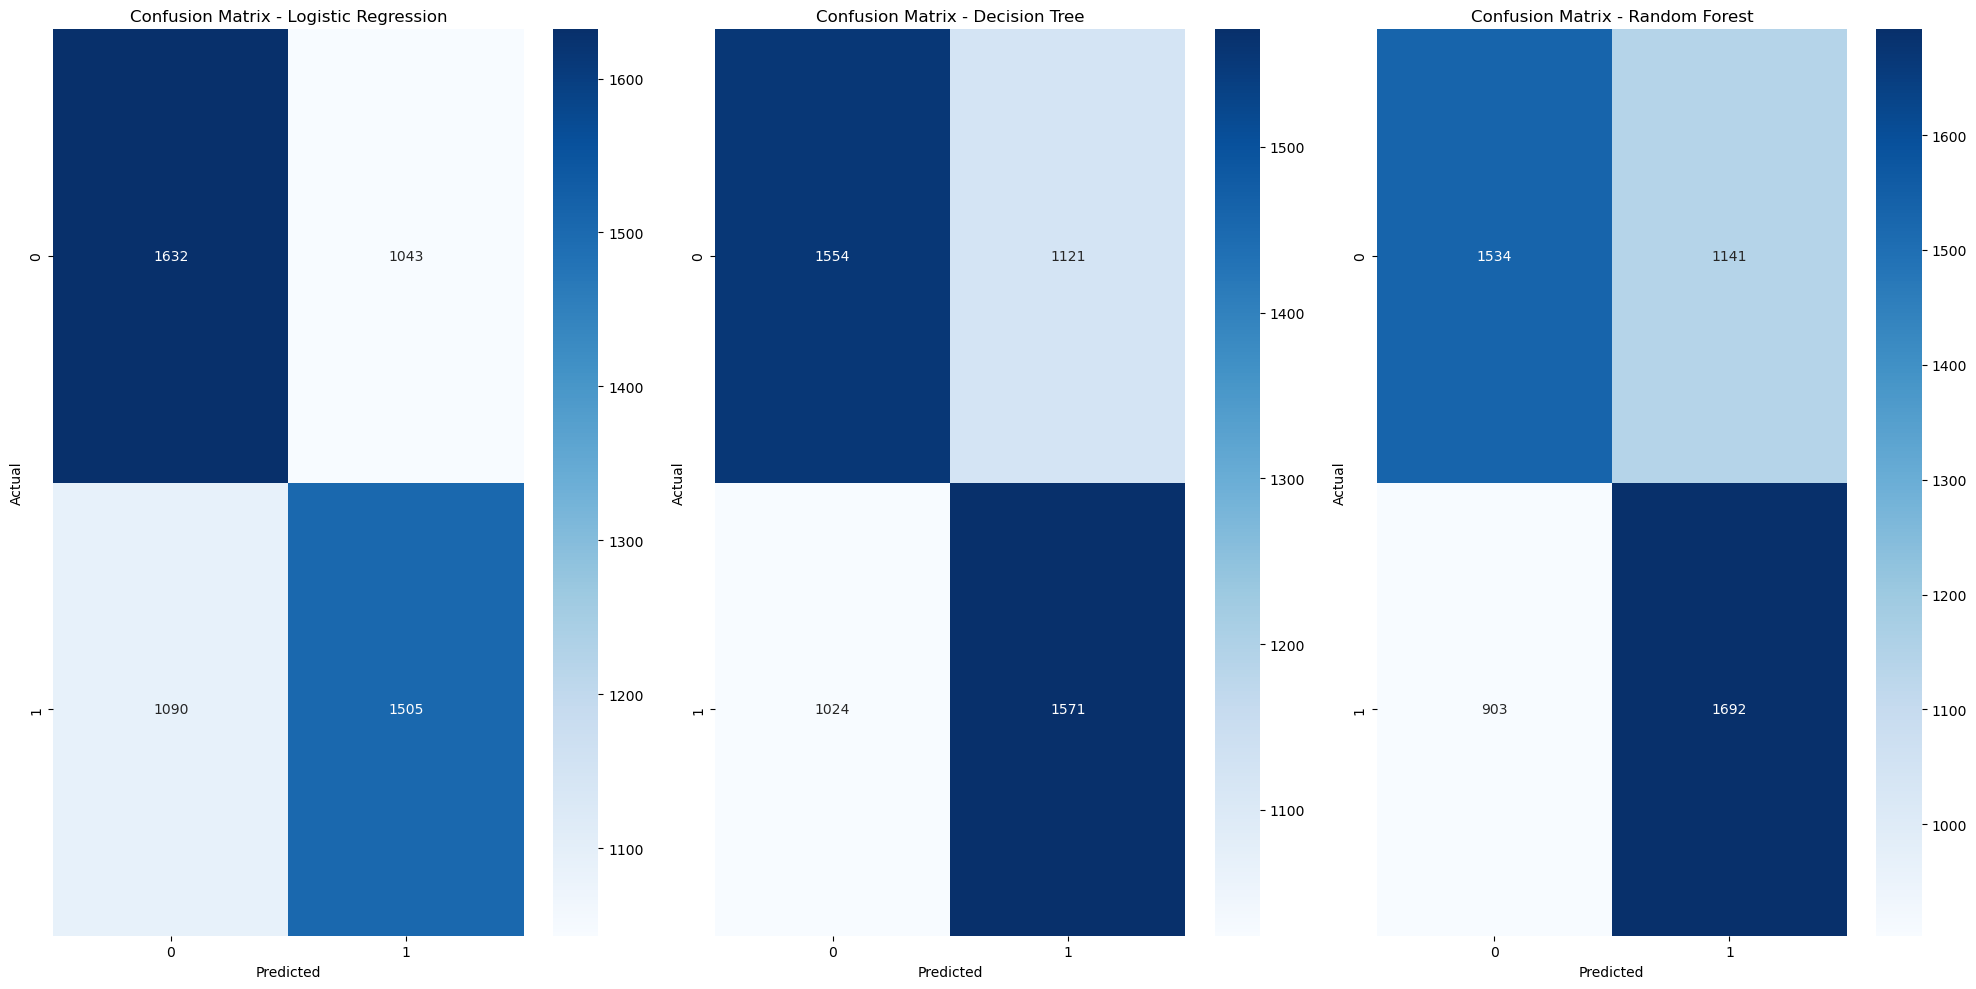

In [956]:
from sklearn.metrics import confusion_matrix

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

logreg_cm = confusion_matrix(test_target, predictions)
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

dt_cm = confusion_matrix(test_target, dt_predictions)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

rf_cm = confusion_matrix(test_target, rf_predictions)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [957]:
test_metrics_df = calculate_metrics(models, test_features_preprocessed, test_target)

# Display the test set metrics DataFrame
print("Test Set Metrics:")
test_metrics_df = pd.DataFrame(test_metrics_df)
print(test_metrics_df)

Test Set Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.595256   0.590659  0.579961  0.585262
1        Decision Tree  0.592979   0.583581  0.605395  0.594288
2        Random Forest  0.612144   0.597247  0.652023  0.623434
3    Gradient Boosting  0.613662   0.600072  0.645857  0.622123
4                  SVC  0.613852   0.596618  0.666281  0.629528
5                 MLPC  0.584440   0.583368  0.546050  0.564092


En comparant les performances entre les ensembles d'entraînement et de test, on peut noter que certains modèles ont tendance à avoir une meilleure performance sur l'ensemble d'entraînement par rapport à l'ensemble de test. Cela peut indiquer une certaine surajustement (overfitting) du modèle à l'ensemble d'entraînement.

La forêt aléatoire, le boosting par gradient et le SVC semblent mieux généraliser, car leurs performances sur l'ensemble de test sont similaires à celles sur l'ensemble d'entraînement. Cependant, la forêt aléatoire obtient les meilleures performances globales sur les deux ensembles avec une précision de 59,7 %, un rappel de 65,2 % et un score F1 de 62,3 % sur l'ensemble de test.

### Importance des variables for random forest

In [958]:
train_features_preprocessed = pd.DataFrame(train_features_preprocessed, columns=preprocessor.transformers_[0][2].tolist() + preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2]).tolist())
test_features_preprocessed = pd.DataFrame(test_features_preprocessed, columns=preprocessor.transformers_[0][2].tolist() + preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2]).tolist())


In [959]:
train_features_preprocessed.columns

Index(['Court', 'LPts', 'Wsets', 'Lsets', 'MaxW', 'MaxL', 'AvgL', 'Year',
       'Month', 'Day', 'Weekday', 'diff_rank', 'diff_pts', 'Series_ATP250',
       'Series_ATP500', 'Series_Grand Slam', 'Series_International',
       'Series_International Gold', 'Series_Masters', 'Series_Masters 1000',
       'Series_Masters Cup', 'Surface_Carpet', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Round_1st Round', 'Round_2nd Round', 'Round_3rd Round',
       'Round_4th Round', 'Round_Quarterfinals', 'Round_Round Robin',
       'Round_Semifinals', 'Round_The Final'],
      dtype='object')

Text(0.5, 1.0, 'Features importance in the optimal Random Forest estimator')

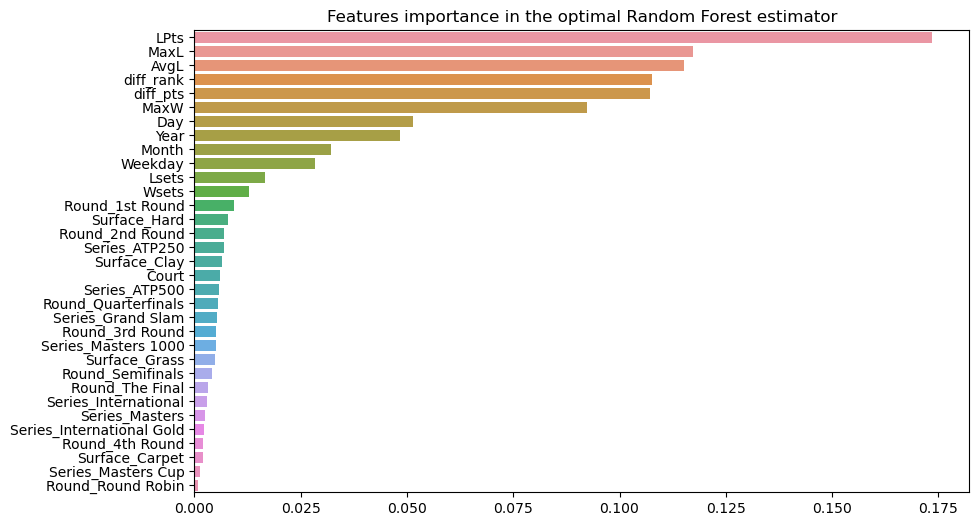

In [960]:
train_features_df = pd.DataFrame(train_features_preprocessed, columns=train_features.columns)

feature_imp = pd.Series(rf_model.feature_importances_, index=train_features_preprocessed.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Features importance in the optimal Random Forest estimator')


Il est intéressant de constater que les variables que nous avons créées ont une influence sur les performances des modèles. En d'autres termes, l'ajustement des valeurs que nous avons effectué semble avoir un impact sur les résultats des prédictions.

Cela suggère que la création de ces variables a apporté des informations supplémentaires ou a aidé à capturer des relations importantes dans les données. Ces variables ajustées peuvent avoir aidé les modèles à mieux discriminer entre les classes de manière plus précise, ce qui a conduit à de meilleures performances globales.